# Decision Trees
<img src="../images/decision_tree.png" width="450" />

## Introduction
Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They are a non-linear model that makes decisions based on a set of rules learned from the training data. A decision tree breaks down a dataset into smaller and more manageable subsets by recursively partitioning it based on the values of input features. Each internal node of the tree represents a decision point, each branch represents a possible outcome of a decision, and each leaf node represents the predicted output or class.

Decision trees aren't often used by themselves, as they easily overfit to the training data. However, they can be extremely powerful when using techniques to mitigate this, including:
- Bagging
- Boosting
- Pruning

For example, random forests are one of the most widely used models in industry (e.g. fraud detection, disease prediction, stock market analysis). Random forests employ bagging (both for the training data and features). These are covered in other notebooks.

## Growing a Tree
At a high level, a decision tree is built in the following way:
1. Begin with the entire training dataset
2. Determine the best feature in the dataset to split the data on. This feature is chosen by maximizing the possibly "impurity" of the dataset (using metrics such as entropy or gini index)
3. Split the data into subsets on this feature
4. Recursively apply steps 2-3 on subtrees


## Demo

In [73]:
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Classification

In [14]:
# Load data
data = load_iris()
X = data.data
y = data.target
df = pd.DataFrame(data= np.c_[data['data'],data['target']],
                  columns= data['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


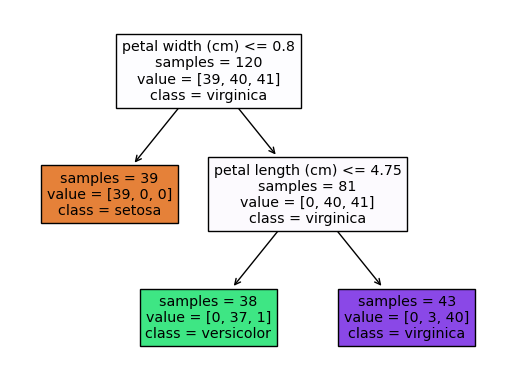

Accuracy: 0.9


In [68]:
# Train decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Plot decision tree
tree.plot_tree(clf, feature_names=data.feature_names,  
                    class_names=data.target_names,
                    filled=True, impurity=False)
plt.show()

# Evaluate model
y_pred = clf.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy: {}'.format(round(score, 4)))

### Regression

In [71]:
# Load data
data = fetch_california_housing()
X = data.data
y = data.target
df = pd.DataFrame(data= np.c_[data['data'],data['target']],
                  columns= data['feature_names'] + ['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


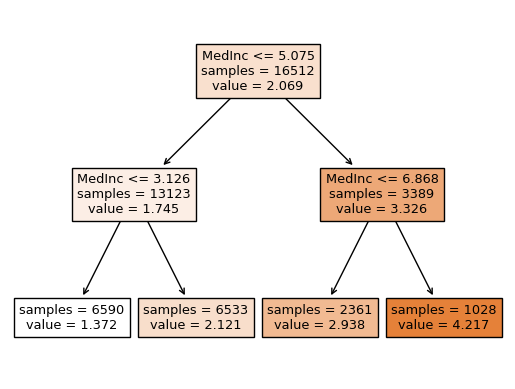

MSE: 0.7385


In [76]:
# Train decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
clf = DecisionTreeRegressor(max_depth=2)
clf.fit(X_train, y_train)

# Plot decision tree
tree.plot_tree(clf, feature_names=data.feature_names,  
                    class_names=data.target_names,
                    filled=True, impurity=False)
plt.show()

# Evaluate model
y_pred = clf.predict(X_test)
score = mean_squared_error(y_pred, y_test)
print('MSE: {}'.format(round(score, 4)))